In [1]:
from utils.access_data import *

from utils.constants import *

import pandas as pd
pd.set_option('display.max_rows', 1000)

In [2]:
USGS_data = get_USGS_data("olivine (Fo80)", CRISM_match=False)

In [4]:
endmember = "olivine (Fo51)"
file_name = USGS_DATA + endmember + ".csv"
for r in ["(", ")", " "]:
    file_name = file_name.replace(r, "").lower()
data = pd.read_csv(file_name)

In [5]:
data.loc[data['reflectance'] < 0, 'reflectance'] = 0

In [ ]:
for endmember in USGS_PURE_ENDMEMBERS:
    if endmember != 'basaltic glass':
        USGS_data = get_USGS_data(endmember, CRISM_match=False)
        if USGS_data['wavelength'].tolist() != oliv_fo80_wavelengths:


In [ ]:
from utils.plotting import *
plot_endmembers()

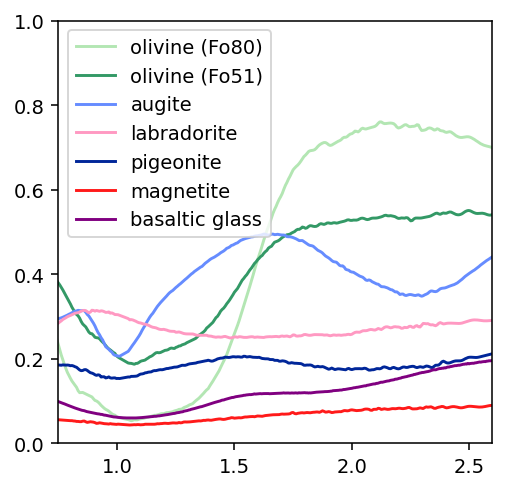

In [1]:
from utils.plotting import *
plot_endmembers(CRISM_match=False)

#### Verify angles of RELAB data

From RELAB documentation here http://www.planetary.brown.edu/relabdata/catalogues/Catalogue_README.html

SourceAngle = Angle of illumination in degrees

DetectAngle = Angle of emergence or detection in degrees

In [ ]:
from utils.access_data import *
spectra_db = get_data()

In [18]:
# SourceAngle
# DetectAngle 
OLIVINE_SID = "C1PO17" 

source_angle = spectra_db[spectra_db['SpectrumID']  == OLIVINE_SID]['SourceAngle'].values[0]
phase_angle = spectra_db[spectra_db['SpectrumID']  == OLIVINE_SID]['PhaseAngle'].values[0]
emission_angle = spectra_db[spectra_db['SpectrumID']  == OLIVINE_SID]['DetectAngle'].values[0]
print("Incidence angle: " + str(source_angle) + ", phase angle: " + str(phase_angle)
      + ", emission angle: " + str(emission_angle))

Source angle: 30.0, phase angle: 30.0, emission angle: 0.0
